## Homework: LLM Orchestration and Ingestion

Our FAQ documents change with time: students add more records and edit existing ones. We need to keep our index in sync.

There are two ways of doing it:

- Incremental: you only update records that got changed, created or deleted
- Full update: you recreate the entire index from scratch

In this homework, we'll look at full update. We will run our indexing pipeline daily and re-create the index from scracth each time we run.

For that, we created two FAQ documents for LLM Zoomcamp
- [version 1](https://docs.google.com/document/d/1qZjwHkvP0lXHiE4zdbWyUXSVfmVGzougDD6N37bat3E/edit)
- [version 2](https://docs.google.com/document/d/1T3MdwUvqCL3jrh3d3VCXQ8xE0UqRzI3bfgpfBq3ZWG0/edit)


First, we will run our ingestion pipeline with version 1 and then with version 2.


## Q1. Running Mage
Clone the same repo we used in the module and run mage:

```git clone https://github.com/mage-ai/rag-project```

Add the following libraries to the requirements document:

```python-docx elasticsearch```

Make sure you use the latest version of mage:


```./scripts/start.sh```

Start it:

```./scripts/start.sh```

Now mage is running on http://localhost:6789/


### Question:

What's the version of mage?

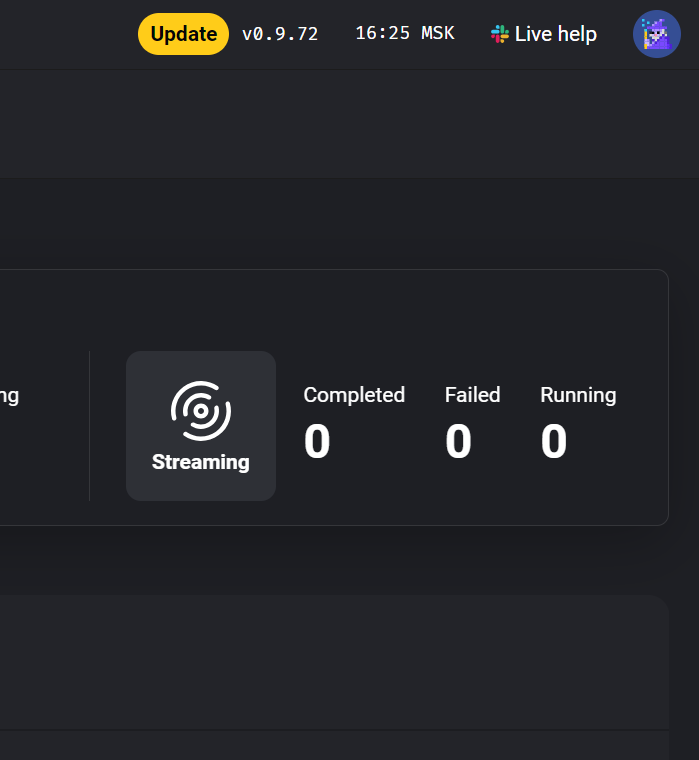

### Answer:
- 0.9.72

## Creating a RAG pipeline
Create a RAG pipeline

## Q2. Reading the documents
Now we can ingest the documents. Create a custom code ingestion block

Let's read the documents. We will use the same code we used for parsing FAQ: parse-faq-llm.ipynb

Use the following document_id: 1qZjwHkvP0lXHiE4zdbWyUXSVfmVGzougDD6N37bat3E

Which is the document ID of LLM FAQ version 1

Copy the code to the editor How many FAQ documents we processed?

- 1
- 2
- 3
- 4

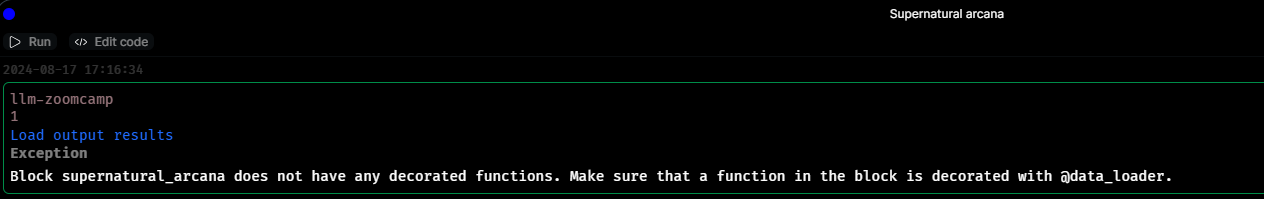

### Answer:
- 1 

## Q3. Chunking
We don't really need to do any chuncking because our documents already have well-specified boundaries. So we just need to return the documents without any changes.

So let's go to the transformation part and add a custom code chunking block:

In [59]:
documents = []

for doc in data['documents']:
    doc['course'] = data['course']
    # previously we used just "id" for document ID
    doc['document_id'] = generate_document_id(doc)
    documents.append(doc)

print(len(documents))

return documents

Where data is the input parameter to the transformer.

And the generate_document_id is defined in the same way as in module 4:

In [ ]:
import hashlib

def generate_document_id(doc):
    combined = f"{doc['course']}-{doc['question']}-{doc['text'][:10]}"
    hash_object = hashlib.md5(combined.encode())
    hash_hex = hash_object.hexdigest()
    document_id = hash_hex[:8]
    return document_id

Note: if instead of a single dictionary you get a list, add a for loop:



In [ ]:
for course_dict in data:
    ...

You can check the type of data with this code:

In [ ]:
print(type(data))

### Question:
How many documents (chunks) do we have in the output?

- 66
- 76
- 86
- 96

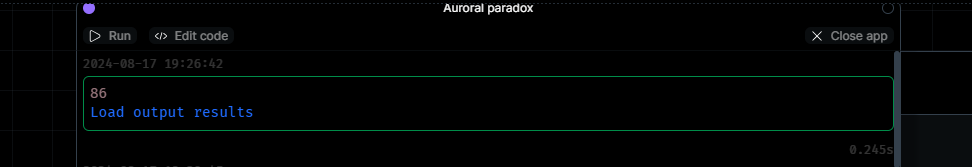

### Answer:
- 86

## Tokenization and embeddings

We don't need any tokenization, so we skip it.

Because currently it's required in mage, we can create a dummy code block:

- Create a custom code block
- Don't change it

Because we will use text search, we also don't need embeddings, so skip it too.

If you want to use sentence transformers - the ones from module 3 - you don't need tokenization, but need embeddings (you don't need it for this homework)

## Q4. Export
Now we're ready to index the data with elasticsearch. For that, we use the Export part of the pipeline

- Go to the Export part
- Select vector databases -> Elasticsearch
- Open the code for editing
  
Because we won't use vector search, but usual text search, we will need to adjust the code.

First, let's change the line where we read the index name:

In [ ]:
index_name = kwargs.get('index_name', 'documents')

To ```index_name_prefix``` - we will parametrize it with the day and time we run the pipeline

In [ ]:
from datetime import datetime

index_name_prefix = kwargs.get('index_name', 'documents')
current_time = datetime.now().strftime("%Y%m%d_%M%S")
index_name = f"{index_name_prefix}_{current_time}"
print("index name:", index_name)

We will need to save the name in a global variable, so it can be accessible in other code blocks

In [ ]:
from mage_ai.data_preparation.variable_manager import set_global_variable

set_global_variable('YOUR_PIPELINE_NAME', 'index_name', index_name)

Where your pipeline name is the name of the pipeline, e.g. transcendent_nexus (replace the space with underscore _)

Replace index settings with the settings we used previously:

In [ ]:
index_settings = {
    "settings": {
        "number_of_shards": number_of_shards,
        "number_of_replicas": number_of_replicas
    },
    "mappings": {
        "properties": {
            "text": {"type": "text"},
            "section": {"type": "text"},
            "question": {"type": "text"},
            "course": {"type": "keyword"},
            "document_id": {"type": "keyword"}
        }
    }
}

Remove the embeddings line:

In [ ]:
if isinstance(document[vector_column_name], np.ndarray):
    document[vector_column_name] = document[vector_column_name].tolist()

At the end (outside of the indexing for loop), print the last document:

In [ ]:
print(document)

Now execute the block.

### Question: 
What's the last document id?

Also note the index name.m

### Answer:
- 6fc3236a

Index name: 

```documents_20240817_3146```

## Q5. Testing the retrieval
Now let's test the retrieval. Use mage or jupyter notebook to test it.

Let's use the following query: "When is the next cohort?"

### Question:
What's the ID of the top matching result?

### Answer:
